In [1]:
using Pkg
using Knet

In [2]:
# using NBInclude
# @nbinclude("Bimodal_Embedding.ipynb")
include("Bimodal_Embedding.jl")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed DiffResults ────── v1.0.1
 Installed ColorVectorSpace ─ v0.8.1
 Installed ForwardDiff ────── v0.10.8
 Installed ColorTypes ─────── v0.8.1
 Installed Plots ──────────── v0.28.4
  Updating `~/.julia/environments/v1.2/Project.toml`
  [91a5bcdd] ↑ Plots v0.28.3 ⇒ v0.28.4
  Updating `~/.julia/environments/v1.2/Manifest.toml`
  [3da002f7] ↑ ColorTypes v0.8.0 ⇒ v0.8.1
  [c3611d14] ↑ ColorVectorSpace v0.8.0 ⇒ v0.8.1
  [163ba53b] ↑ DiffResults v0.0.4 ⇒ v1.0.1
  [f6369f11] ↑ ForwardDiff v0.10.7 ⇒ v0.10.8
  [91a5bcdd] ↑ Plots v0.28.3 ⇒ v0.28.4
  Building Plots → `~/.julia/packages/Plots/qZHsp/deps/build.log`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/

┌ Info: Recompiling stale cache file /home/okolukisa/.julia/compiled/v1.2/Images/H8Vxc.ji for Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1240


 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
695-element Array{Int32,1}
695-element Array{Tuple{Tuple{Array{UInt8,3},Array{UInt8,3}},String},1}


trans_nll (generic function with 1 method)

In [3]:
dataset_instructions = []

open("instructions_unique.txt") do file
    for f in eachline(file)
    push!(dataset_instructions,f)    
    end
end
# if (gpu()>=0)
#     dataset_instructions = KnetArray(dataset_instructions)
# end
summary(dataset_instructions[1])


"String"

In [4]:
Pkg.add("VideoIO"); using VideoIO

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /home/okolukisa/.julia/compiled/v1.2/VideoIO/tZxJ7.ji for VideoIO [d6d074c3-1acf-5d4c-9a43-ef38773959a2]
└ @ Base loading.jl:1240


In [5]:
Pkg.add("Images"); using Images; Pkg.add("Colors"); using Colors

 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


In [6]:
function GetPreProcessedImageArrayDataset(img, cropfromleft::Float64, cropfromright::Float64, cropfromtop::Float64, cropfrombottom::Float64, target_height::Int, target_width::Int)
    channels, height, width = size(img)
    img = img[:,Int(round(height*cropfromtop))+1:Int(round((1-cropfrombottom)*height)), Int(round(width*cropfromleft))+1:Int(round((1-cropfromright)*width))]
    img = imresize(img, (channels, target_height, target_width))
    permutedims(img, (2,3,1))
end

GetPreProcessedImageArrayDataset (generic function with 1 method)

In [7]:
io = VideoIO.open("stupid_vid.webm")
f = VideoIO.openvideo(io)
target_width = 160
target_height = 210
crop_from_top = 0.1
crop_from_bottom = 0.12
crop_from_left = 0.15
crop_from_right = 0.15

frames = []
history = []

for i = 1:9
    img = read(f)
    img = GetPreProcessedImageArrayDataset(channelview(img), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom, target_height, target_width)
    push!(history, img)
end



while !eof(f)
    global current_frame
    
    prev_9_frame = history[1]
    prev_4_frame = history[6]
    prev_frame = history[8]
    current_frame = history[9]
    push!(frames, (prev_9_frame, prev_4_frame, prev_frame, current_frame))
    
    current_frame = read(f)
    current_frame = GetPreProcessedImageArrayDataset(channelview(current_frame), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom,target_height, target_width)

    push!(history, current_frame)
    deleteat!(history, 1)
end

close(f)
summary(frames)

"2936-element Array{Any,1}"

In [8]:
# io = VideoIO.open("montezuma2.mp4")
# f = VideoIO.openvideo(io)
# target_width = 160
# target_height = 210
# crop_from_top = 0.1
# crop_from_bottom = 0.12
# crop_from_left = 0.15
# crop_from_right = 0.15
# img = read(f)
# img = GetPreProcessedImageArrayDataset(channelview(img), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom, target_height, target_width)
# # img = reinterpret.(UInt8,img)
# frame_pairs = []
# println(summary(img))
# current_frame = img

# while !eof(f)
#     global current_frame
#     prev_frame = current_frame
#     current_frame = read(f)
#     current_frame = GetPreProcessedImageArrayDataset(channelview(current_frame), crop_from_left, crop_from_right, crop_from_top, crop_from_bottom,target_height, target_width)
# #     current_frame = reinterpret.(UInt8,current_frame)
# #     current_frame = UInt8.(current_frame)
#     push!(frame_pairs, (prev_frame, current_frame))

# end

# # if (gpu()>=0)
# #     frame_pairs = KnetArray(frame_pairs)
# # end
# close(f)
# summary(frame_pairs)

In [9]:
check_dataset = frames
summary(check_dataset)

"2936-element Array{Any,1}"

In [10]:
Knet.save("empty_frames.jld2", "dataset",check_dataset)
# summary(b)

In [15]:
check_dataset = []
for i in 1:length(frame_pairs)
    
        data = (frame_pairs[i],dataset_instructions[21])
        push!(check_dataset,data)
    
end
# # Knet.save("checkDataset.jld2", "model", hope_dataset)
println(summary(check_dataset))
# # if (gpu()>=0)
# #     check_dataset = KnetArray(check_dataset)
# # end
# minibatches = minibatch(check_dataset, ones(length(check_dataset)), BATCHSIZE)
# summary(minibatches)

3480-element Array{Any,1}


In [10]:
a = []
a1 = collect(770:800)
a2 = collect(850:860)
a3 = collect(1065:1118)
a4 = collect(1126:1160)
a5 = collect(1170:1280)
# a6 = collect(542:594)
# a7 = collect(602:654)
# a8 = collect(2057:2058)
# a9 = collect(1914:1915)
# a10 = collect(2159:2171)
# a11 = collect(2237:224

push!(a, a1, a2,a3,a4,a5)
j = collect(flatten(a))

242-element Array{Int64,1}:
  770
  771
  772
  773
  774
  775
  776
  777
  778
  779
  780
  781
  782
    ⋮
 1269
 1270
 1271
 1272
 1273
 1274
 1275
 1276
 1277
 1278
 1279
 1280

In [7]:
d=Knet.load("4dataset_total2.jld2","dataset")
summary(d)

"24951-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [12]:

for i in 1:length(check_dataset)
    if i in j
        push!(d, (check_dataset[i],dataset_instructions[20]))
    end
end
summary(d)

"653-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [15]:
summary(d[1])

"Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String}"

In [13]:
Knet.save("4dataset_stupid_true.jld2","dataset",d)

In [14]:
d1 = Knet.load("4dataset_new.jld2","dataset")
d2 = append!(d1,d)
Knet.save("4dataset_new2.jld2","dataset",d2)
summary(d2)

"6605-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [15]:
d3 = Knet.load("4dataset_false.jld2","dataset")
d4 = append!(d2,d3)
Knet.save("4dataset_total2.jld2","dataset",d4)
summary(d4)

"24251-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [38]:
response = readline()
parse(Int, response)


stdin>  45


45

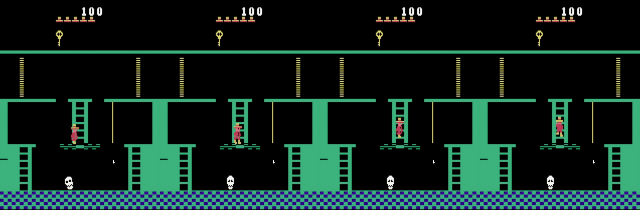

count: 1565


stdin>  exit


"0-element Array{Any,1}"

In [13]:
i = 1565
new_dataset = []
while i <= length(check_dataset)
    IJulia.clear_output(true)
    display(colorview(RGB, permutedims(hcat(check_dataset[i][1],check_dataset[i][2],check_dataset[i][3],check_dataset[i][4]), (3,1,2))))
    println("count: ", i)
    response = readline()
    if (response == "")
        i+=1
        continue
    
    elseif(response == "p")
        i-=1
    elseif(response == "r")
        new_dataset=new_dataset[1:length(new_dataset)-1]
    elseif (response == "s")
        i+=10
    elseif(response=="exit")
        break
    else
        push!(new_dataset,(check_dataset[i],dataset_instructions[parse(Int,response)]))
        i+=1
    end
#     if i in j
#          push!(new_dataset,check_dataset[i])
#     end
    
                        
                        
end
summary(new_dataset)

In [30]:
# # both_frames = hcat(frame_pairs[1][1], frame_pairs[1][2])
# # summary(both_frames)
# # channelview(RGB, both_frames)
# xxx = Knet.load("checkDataset.jld2", "model")
# (x,y)= first(minibatches)
# println(summary(xxx))

new_dataset[1][2]
# dataset_p = Knet.load("4dataset_new.jld2","dataset") 
# dataset = append!(dataset_p,new_dataset)

"Get the torch"

In [24]:
Knet.save("4dtaset_new.jld2","dataset",dataset)

In [61]:
append!(true_dataset,new_dataset)
summary(true_dataset)

"987-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

In [62]:
Knet.save("4dataset_jump.jld2","dataset",true_dataset)

In [12]:
# b(check_dataset)
# b(minibatches)
convertsimilaritytoprobdist(b(first(minibatches)[1]))

40×8 Array{Int64,2}
w is: 12×21 Param{Array{Float32,2}}
40×8 Array{Int64,2}
w is: 12×21 Param{Array{Float32,2}}


2×40 Array{Float64,2}:
 0.137437  0.0662877  0.898514  0.898013  …  0.897783  0.897783  0.201397
 0.862563  0.933712   0.101486  0.101987     0.102217  0.102217  0.798603

In [9]:
check_dataset= Knet.load("4dataset_new.jld2","dataset")
summary(check_dataset)

"5952-element Array{Tuple{NTuple{4,Array{Normed{UInt8,8},3}},String},1}"

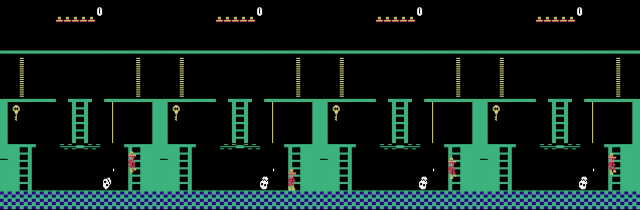

count: 1304


In [ ]:
# hope_dataset = []
# similarity_array = convertsimilaritytoprobdist(b(minibatches))
# check_dataset= Knet.load("4dataset_new.jld2","dataset")
i = 700

while i <= length(check_dataset)
    IJulia.clear_output(true)
    display(colorview(RGB, permutedims(hcat(check_dataset[i][1],check_dataset[i][2],check_dataset[i][3],check_dataset[i][4]), (3,1,2))))
    println("count: ", i)
    sleep(0.4)
    i+=1
#     response = readline()
#     if (response == "")
#         i+=1
#         continue
#     elseif(response == "p")
#         i-=1
#    elseif (response == "s")
#         i+=10
#     elseif(response=="exit")
#         break
#     else
#          i+=1
#     end
end

# if (gpu()>=0)
#     hope_dataset = KnetArray(hope_dataset)
# end
# argmax(convertsimilaritytoprobdist(b(first(dtst)[1]))[:,sample])

 Knet.save("hopeDataset.jld2", "model", hope_dataset)

In [2]:
hope_dataset = Knet.load("hopeDataset.jld2", "model")
summary(hope_dataset)

UndefVarError: UndefVarError: Knet not defined

In [4]:
summary(hope_dataset[1][1][1])

"210×160×3 Array{N0f8,3} with eltype Normed{UInt8,8}"

In [5]:
using TestImages,Images, Colors

In [11]:
colorview(permutdims(hcat(hope_dataset[1655][1][1],hope_dataset[1655][1][2]),(3,1,2))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>55: "map(clim-mapped image, input…
  "annotations" => 4: "input-3" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 3: "CLim" = CLim{Normed{UInt8,8}}(0.0, 0.984) CLim{Normed{UI…

In [1]:
hope_dataset[1655][2]

UndefVarError: UndefVarError: hope_dataset not defined

In [ ]:

i = 1655
imshow(hcat(hope_dataset[i][1][1],hope_dataset[i][1][2]))
println(hope_dataset[i][2])
if(readline()[1]=='y')
    println("Yes")
end
ImageView.close()